In [ ]:
using Pkg
Pkg.add("TransformVariables")

In [18]:
# Load packages
using Plots
using Interpolations
using QuantEcon
using Parameters
using Optim
using Optim: minimum, minimizer
using TransformVariables
#using FastChebInterp
using DataFrames
using Roots
using ProgressMeter

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2))


In [ ]:
\alpha = 0.36
\beta = 0.96


In [1]:
for n in 1:8
    print(10.0^(-n), " ")
end

0.1 0.010000000000000002 0.001 0.0001 1.0e-5 1.0e-6 1.0e-7 1.0e-8 

In [33]:
a = 1
b = 100_000
c_arr = []

for n in 1:8 
    c_val = 10.0^(-n)
    push!(c_arr, c_val)
end

In [34]:
function quad(a, b, c)
    pos = (-b + (b^2 - (4*a*c))^(0.5)) / (2a)
    neg = (-b - (b^2 - (4*a*c))^(0.5)) / (2a)
    return (neg, pos)
end

quad (generic function with 2 methods)

In [40]:
function q(a,b,c)
    
    q = -(1/2) * (b + sign(b) * sqrt(b^2 - 4*a*c))

    return q
end

q (generic function with 1 method)

In [36]:
x_tuples = []
x_negs = []
x_pos = []

for c in c_arr
    xT = quad(a,b,c)

    x_neg_val = xT[1]
    x_pos_val = xT[2]
    
    push!(x_tuples, xT)
    push!(x_negs, x_neg_val)
    push!(x_pos, x_pos_val)
end

In [37]:
x_negs, x_pos

(Any[-99999.99999899999, -99999.9999999, -99999.99999999, -99999.999999999, -99999.9999999999, -100000.0, -100000.0, -100000.0], Any[-1.0000003385357559e-6, -1.00000761449337e-7, -9.997165761888027e-9, -1.0040821507573128e-9, -1.0186340659856796e-10, -7.275957614183426e-12, 0.0, 0.0])

In [45]:
x1_arr = []
x2_arr = []

for c in c_arr
    q1 = q(a,b,c)

    x1 = q1 / a
    x2 = c / q1

    push!(x1_arr, x1)
    push!(x2_arr, x2)
end

In [47]:
x1_arr, x2_arr

(Any[-99999.99999899999, -99999.9999999, -99999.99999999, -99999.999999999, -99999.9999999999, -100000.0, -100000.0, -100000.0], Any[-1.0000000000100002e-6, -1.0000000000010002e-7, -1.0000000000001e-8, -1.00000000000001e-9, -1.0000000000000011e-10, -1.0e-11, -1.0e-12, -1.0e-13])

In [62]:
diff_negatives = []
diff_positives = []

for i in 1:length(c_arr)
    diff_neg = x_negs[i] - x1_arr[i]
    diff_pos = x_pos[i] - x2_arr[i]

    push!(diff_negatives, diff_neg)
    push!(diff_positives, diff_pos)
end

In [64]:
diff_positives

8-element Vector{Any}:
 -3.385257556352448e-13
 -7.614492369808433e-13
  2.8342381129722522e-12
 -4.082150757302786e-12
 -1.8634065985678556e-12
  2.7240423858165735e-12
  1.0e-12
  1.0e-13

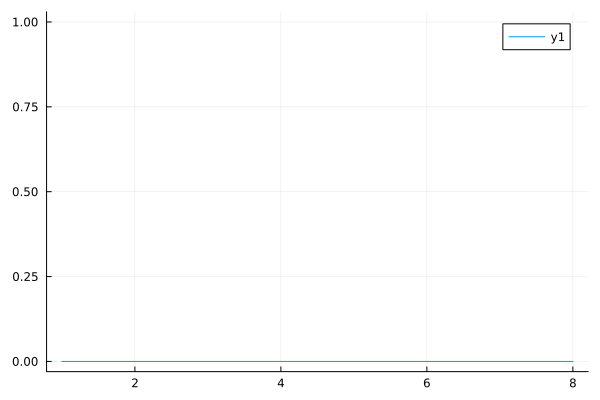

In [56]:
plot(1:8, (diff_negatives))


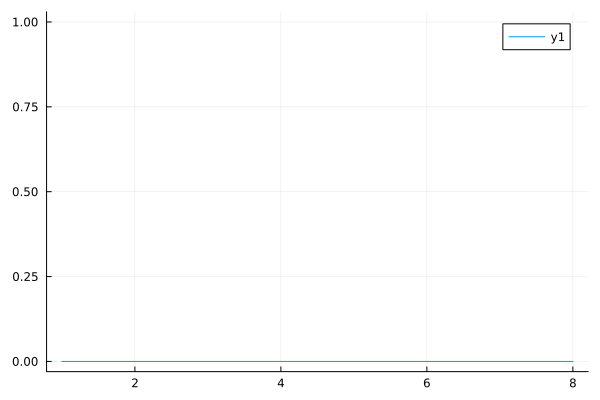

In [55]:
plot(1:8, (diff_negatives))

# Question 2

In [4]:
phi = (5^(0.5) - 1) / 2

0.6180339887498949

In [6]:
phi1 = phi
phi0 = 1

1

In [7]:
phis_power = [phi0, phi1]
for n in 2:20
    phi_n = phi^(n)
    push!(phis_power, phi_n)
end

In [28]:
phis_recursion = [phi0, phi1]

for n in 2:20
    phi_plus1 = phis_recursion[n-1] - phis_recursion[n]

    push!(phis_recursion, phi_plus1)
end

In [29]:
phis_power

21-element Vector{Float64}:
 1.0
 0.6180339887498949
 0.3819660112501052
 0.23606797749978975
 0.14589803375031551
 0.09016994374947428
 0.055728090000841245
 0.034441853748633046
 0.021286236252208202
 0.013155617496424849
 0.008130618755783355
 0.005024998740641495
 0.0031056200151418616
 0.001919378725499634
 0.0011862412896422284
 0.0007331374358574057
 0.00045310385378482274
 0.0002800335820725831
 0.00017307027171223962
 0.00010696331036034356
 6.610696135189609e-5

In [30]:
phis_recursion

21-element Vector{Float64}:
 1.0
 0.6180339887498949
 0.3819660112501051
 0.2360679774997898
 0.1458980337503153
 0.09016994374947451
 0.05572809000084078
 0.03444185374863373
 0.021286236252207047
 0.013155617496426686
 0.008130618755780361
 0.005024998740646325
 0.0031056200151340363
 0.0019193787255122885
 0.0011862412896217478
 0.0007331374358905407
 0.0004531038537312071
 0.0002800335821593336
 0.0001730702715718735
 0.00010696331058746011
 6.610696098441338e-5

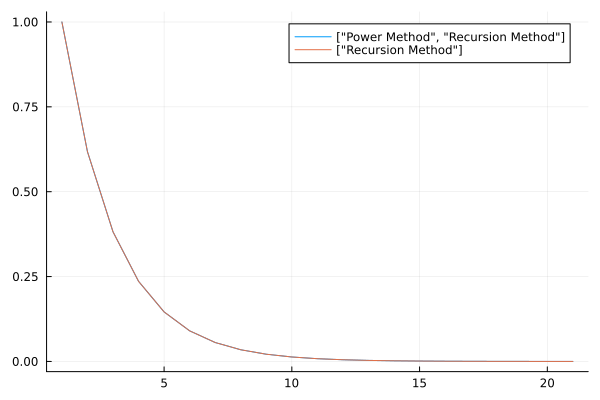

In [35]:
plot(1:21, (phis_power), labels = ["Power Method", "Recursion Method"])
plot!(1:21, (phis_recursion), labels = ["Recursion Method"])

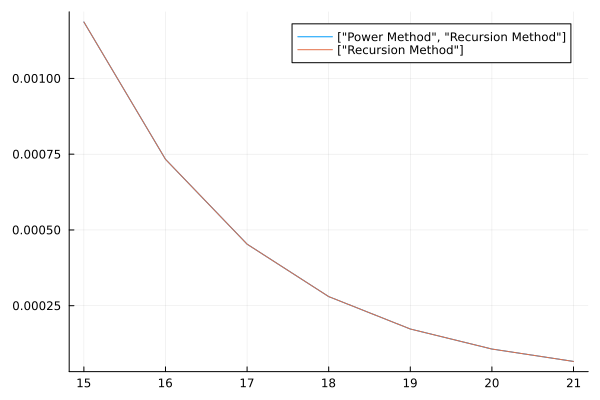

In [39]:
plot(15:21, (phis_power[15:21]), labels = ["Power Method", "Recursion Method"])
plot!(15:21, (phis_recursion[15:21]), labels = ["Recursion Method"])

# Question 3: VFI

In [60]:
params = (alph = 0.4, delta = 0.1, A = 1, beta = 0.96)

(alph = 0.4, delta = 0.1, A = 1, beta = 0.96)

In [61]:
function U(c)
    return log(c)
end

U (generic function with 1 method)

In [65]:
function f(k, params)
    @unpack alph, delta, A = params
    y = A * (k ^ alph) + ((1- delta) * k)
    return y
end

f (generic function with 1 method)

In [ ]:
V = zeros(11, 11)
Vprime = zeros(11, 11)
K_grid = range(0.1, 5.0, length=11)
k_prime = copy(K_grid)

0.1:0.49:5.0

In [ ]:
iter = 1000
toler = 10e-8

for i in 1:iter
    
    C = 
    V_new .= U.(f.(K_grid, Ref(params)) .- k_prime') .+ params.beta .* interp1d(K_grid, V, kind=:linear).(k_prime')
    

    for (idx, k) in enumerate(K_grid)

        for (jdx, k_p) in enumerate(k_prime)
            y = f(k, params)
            c = y .- k_prime

            V_new[idx, jdx] = U(c) + params.beta * interp1d(K_grid, V, kind=:linear)(k_p)
            
            if V_new[idx, jdx] > V[idx, jdx]
                
                V[idx, jdx] .= V_new[idx, jdx]
                C[idx, jdx] = f(k, params) - k_p

            end
        end

        
    end


    if difference < toler
        break
    end

end

LoadError: UndefVarError: `V_new` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
function update_bellman2!(p, V, policy, grids, EV)
    @unpack kgrid, agrid = grids 
    @unpack α, δ, β, A      = p 
    for sub in CartesianIndices(V)

        ki, ai = sub[1], sub[2]
        k = kgrid[ki]

        z = A * k^α + (1 - δ) * k

        kprime = kgrid
        c = z .- kprime
        
        vmax, pol = @views findmax(u.(c) .+ β .* EV[:, ai])
        V[sub] = vmax
        policy[sub] = pol  # policy here stores the index of the maximizing choice
    end
end


# Define and Solve VFI function
function solve_vfi2!(p, kgrid, V0; tol = 1e-12, maxiter = 1000, debug=false)
    @unpack Na, ρ, σ = p
    V0 = copy(V0)
    V = zeros(size(V0))
    policy = zeros(Int, size(V0))
    errors = Float64[]
    iter = 0

    mc = rouwenho
    agrid = mc.state_values
    
    grids = (; kgrid, agrid)
    
    while true
        iter += 1 
        
        # Step 1: Calculate expected continuation value over income states
        EV = V * P
        
        # Step 2: Update the Bellman equation for each state
        update_bellman2!(p, V, policy, grids, EV)
        
        # Step 3: Check for convergence
        ϵ = maximum(abs.(V - V0))
        push!(errors, ϵ)
        if ϵ < tol || iter >= maxiter
            break 
        end
        V0 .= V
    end
    return (; V, policy, iter, errors, kgrid, agrid, P)
end